<center>
    <h1>Spectral Graph Theory</h1>
    <h3>Community Detection</h3>
    <h4>Garrick 'G Money' Williams</h4>
</center>

<h2>Abstract</h2>

<div style = "text-align: justify">I first introduce the idea of community detection through the use of spectral graph theory. This concerns the analysis of the Laplacian matrix associated with a graph. This will be used to analyze groupings within a potential customer database which will allow personalized communication with these customers. The functions used are self-made functions that provide us with information that will be used in the analysis. These functions include creating a Laplacian matrix from a vertex set and an edge set, creating a graph of the sets, finding the communities detected through the eigenvectors, and creating a matrix of the eigenstuff which provides us reference for the analysis. I then compare two different edge sets and evaluate the strength of connectivity for the four communities detected. This leads to discovering that the better method for creating connections between customers is to determine if the customers are the same gender within $10$ years age difference <b>OR</b> if the customers' age are within $6$ years difference and they have similar work experience. Some weaknesses are pointed out regarding the functions used and how they might be improved for better interpretation.</div>

<h2>Introduction</h2>

<div style = "text-align: justify">Spectral graph theory is a powerful mathematical tool that allows us to analyze data sets and identify communities within them. By representing data as a graph, where nodes represent individuals or entities and edges represent relationships between them, we can use spectral graph theory to identify groups of nodes that are tightly interconnected and form communities.</div><br>

<div style = "text-align: justify">These communities can be useful for a variety of purposes, such as donor segmentation or more personalized advertising. By understanding the structure of the graph and the relationships between its nodes, we can identify groups of individuals with similar characteristics or interests and target them with tailored messages or campaigns.</div><br>

<div style = "text-align: justify">Using spectral graph theory to identify communities within data sets requires a combination of mathematical expertise and domain-specific knowledge. However, the insights gained from this approach can be invaluable in helping organizations make more informed decisions and achieve their goals more effectively.</div><br>

<div style = "text-align: justify">The data that I have selected to analyze has been downloaded from <a href = "https://www.kaggle.com/datasets/vetrirah/customer">Kaggle</a>. The context of this data is that an automobile company has identified new potential customers. The company would like to segment these new customers into four groupings so that they perform segmented outreach and communication for the different communities of customers.</div>

<h2>Methods</h2>

Pandas is used for the data formation, creating data frames.

`linalg` from numpy is used to find the eigenvalues and eigenvectors.

Numpy is used for calculations, such as finding distance between two values (absolute function).

`pyplot` from matplotlib is used for plotting the graphs.

Random is used for placing identifications randomly around nodes to prevent overlapping.

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from random import randint

I will now read in the data and limit the observations to the first $129$ rows. 

In [2]:
df = pd.read_csv('Test.csv')
df.dropna(inplace = True)
df = df.iloc[:129, :]
df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6


I will now create different edge sets based on differing qualifications to allow comparison. A key point for this project was to find edge sets that create graphs with exactly $1$ component. That is to say, every node is connected to at least one other node among the $129$ observations.

In [3]:
edges = []

for i in range(len(df)):
    base1 = df.iloc[i, 7]
    base2 = df.iloc[i, 5]
    base3 = df.iloc[i, 8] > 2
    base4 = df.iloc[i, 1]
    base5 = df.iloc[i, 2]
    
    edge = []
    edge.append(i)
    
    for j in range(len(df)):
        if j == i:
            pass
        else:
            compare1 = df.iloc[j, 7]
            compare2 = df.iloc[j, 5]
            compare3 = df.iloc[j, 8] > 2
            compare4 = df.iloc[j, 1]
            compare5 = df.iloc[j, 2]
            
            if (base1 == compare1 and base2 == compare2 and base3 == compare3 or base4 == compare4 and base5 == compare5):
                edge.append(j)
    
    if len(edge) > 1:
        edges.append(edge)

In [4]:
edges2 = []

for i in range(len(df)):
    base1 = df.iloc[i, 5] # Profession
    base2 = df.iloc[i, 6] < 7 # Work Experience
    base3 = df.iloc[i, 1] # Gender
    base4 = df.iloc[i, 3] # Age
    base5 = df.iloc[j, 7]
    base6 = df.iloc[j, 8] > 2

    edge = []
    edge.append(i)
    
    for j in range(len(df)):
        if j == i:
            pass
        else:
            compare1 = df.iloc[j, 5]
            compare2 = df.iloc[j, 6] < 7
            compare3 = df.iloc[j, 1]
            compare4 = df.iloc[j, 3]
            compare5 = df.iloc[j, 7]
            compare6 = df.iloc[j, 8] > 2
            
            # if ((base1 == compare1 and base2 == compare2) or (base3 == compare3 and np.absolute(base4 - compare4) < 4)):
            if ((base3 == compare3 and np.absolute(base4 - compare4) < 11) or (np.absolute(base4 - compare4) < 7 and base2 == compare2)):
            # if ((base5 == compare5 and base6 == compare6) or (base1 == compare1 and base3 == compare3)):
                edge.append(j)
    
    if len(edge) > 1:
        edges2.append(edge)

The following function allows me to create a Laplacian matrix, which describes the structure of connectivity for the graph.

In [5]:
def LapMap(edges, df):
    n = len(edges) # assigns n as number of vertices for graph
    A = np.matrix(np.zeros((n, n))) # Creates zero matrix of size n
    vertices = [] # List of vertices, makes making the dictionary easier
    ident = []
    
    # Creating dictionaries for generalization
    for i in edges:
        vertices.append(i[0])
    for i in range(df.shape[0]):
        ident.append(df.iloc[i, 0])
    DictI = dict(list(enumerate((ident)))) # Index: ID
    DictE = dict(list(enumerate((vertices)))) # Index: Vertex
    DictV = {v: k for k, v in DictE.items()} # Vertex: Index
    
    # Editing the Zero Matrix
    for i in edges:
        A[DictV[i[0]], DictV[i[0]]] = len(i) - 1 # Vertex degrees
        for k, j in list(enumerate(i)): # k is a counter from 0 to len(i), j is the elements of i
            if k == 0:
                pass # passes the first entry of i which is the initial vertex
            else:
                A[DictV[i[0]], DictV[j]] = -1 # edit connecting columns to -1
    return A, DictI # Returns the Laplacian matrix and a dictionary of the form {index : ID}

The `ConnectPoints` function allows me to draw the edges between nodes for both of my graphing functions.

In [6]:
def ConnectPoints(x, y, p1, p2, colors):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    
    plt.plot([x1, x2], [y1, y2], color = colors[0])
    colors.remove(colors[0])

This first graphing function is intended for a generic drawing of the graph which applies the nodes of the graph around the circumference of a circle.

In [7]:
def Graph(Matrix, Dict):
    fig = plt.figure(figsize = (5, 5))
    ax = plt.axes()
    x = []
    y = []
    colors = []
    n = Matrix.shape[0]
    count = 0
    
    for i in range(n):
        for j in range(n):
            if j <= i:
                pass
            else:
                if Matrix[i, j] == -1:
                    count += 1
    
    for i in range(n):
        x += [(n/4)*np.cos(i*2*np.pi/n)]
        y += [(n/4)*np.sin(i*2*np.pi/n)]
        xy = [(n/4)*np.cos(i*2*np.pi/n), n/4*np.sin(i*2*np.pi/n)]
        
        # 'ID: ' + str(df.iloc[i, 0])
        
        if np.cos(i*2*np.pi/n) == 1:   # x right
            xy[0] = xy[0]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'left', va = 'center')
            # 'Id: ' + 
            
        elif 0 < np.cos(i*2*np.pi/n) < 1 and np.sin(i*2*np.pi/n) > 0:   # 1st quad
            xy[0] = xy[0]*1.05
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'left', va = 'bottom')
            
        elif np.sin(i*2*np.pi/n) == 1:   # y top
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'center', va = 'bottom')
            
        elif -1 < np.cos(i*2*np.pi/n) < 0 and np.sin(i*2*np.pi/n) > 0:   # 2nd quad
            xy[0] = xy[0]*1.05
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'right', va = 'bottom')
            
        elif np.cos(i*2*np.pi/n) == -1:   # x left
            xy[0] = xy[0]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'right', va = 'center')
            
        elif -1 < np.cos(i*2*np.pi/n) < 0 and np.sin(i*2*np.pi/n) < 0:   # 3rd quad
            xy[0] = xy[0]*1.05
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'right', va = 'top')
            
        elif np.sin(i*2*np.pi/n) == 1:   # y bottom
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'center', va = 'top')
            
        elif 0 < np.cos(i*2*np.pi/n) < 1 and np.sin(i*2*np.pi/n) < 0:   # 4th quad
            xy[0] = xy[0]*1.05
            xy[1] = xy[1]*1.05
            plt.annotate(str(Dict[i]), xy, ha = 'left', va = 'top')
        
    plt.scatter(x, y)
    
    for i in range(count):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    for i in range(n):
        for j in range(n):
            if j <= i:
                pass
            else:
                if Matrix[i, j] == -1:
                    ConnectPoints(x, y, i, j, colors)
                
    plt.axis('off')

<div style = "text-align: justify">This next graphing function uses the eigenvectors to draw the graph. The fiedler eigenvector (associated with the $2^{nd}$ smallest eigenvalue) is used for $x$ coordinates of the nodes and the next eigenvector (associated with the $3^{rd}$ smallest eigenvalue) is used for the $y$ coordinates of the nodes. The identification numbers for each node are colored according to which community they were seperated into. `GRAPH` returns the sets of communities established.</div>

In [8]:
def GRAPH(Matrix, Dict):
    fig = plt.figure(figsize = (5, 5))
    ax = plt.axes()
    x = []
    y = []
    colors = []
    n = Matrix.shape[0]
    countcon = 0
    vecs = pd.DataFrame()
    negneg = []
    negpos = []
    pospos = []
    posneg = []
    
    for i in range(n):
        for j in range(n):
            if j <= i:
                pass
            else:
                if Matrix[i, j] == -1:
                    countcon += 1
                    
    v, V = np.real(np.linalg.eigh(Matrix)[0]), pd.DataFrame(np.real(np.linalg.eigh(Matrix)[1]))    

    for i in range(len(V[1])):
        x += [V[1][i]]
        y += [V[2][i]]
        
        sign = np.random.choice([-1, 1])
        num = np.random.uniform(0.005, 0.03)
        random_num = sign * num
        
        xy = [V[1][i] + sign*random_num, V[2][i] + sign*random_num]
        if V[1][i] < 0 and V[2][i] < 0:
            plt.annotate(str(Dict[i])[-3:], xy, color = 'gray')
            negneg.append(str(Dict[i]))
        elif V[1][i] < 0 and V[2][i] > 0:
            plt.annotate(str(Dict[i])[-3:], xy, color = 'blue')
            negpos.append(str(Dict[i]))
        elif V[1][i] > 0 and V[2][i] > 0:
            plt.annotate(str(Dict[i])[-3:], xy, color = 'gold')
            pospos.append(str(Dict[i]))
        elif V[1][i] > 0 and V[2][i] < 0:
            plt.annotate(str(Dict[i])[-3:], xy, color = 'purple')
            posneg.append(str(Dict[i]))
        else:
            plt.annotate(str(Dict[i]), xy)
            
    plt.scatter(x, y)
    
    for i in range(countcon):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    for i in range(n):
        for j in range(n):
            if j <= i:
                pass
            else:
                if Matrix[i, j] == -1:
                    ConnectPoints(x, y, i, j, colors)
                
    plt.axis('off')
    
    return (negneg, negpos, pospos, posneg) # The different communities (by ID) found through 2 of the eigenvectors

The following function creates a dataframe that displays the eigenvalues (in the first row) with the corresponding eigenvectors in columns below their associated eigenvalue.

In [9]:
def eigenstuff(Mat, Dic):
    eigenvals, eigenvectors = np.linalg.eigh(Mat)
    eigenstuffs = pd.DataFrame(np.round(eigenvals, 3))
    eigenstuffs = pd.concat([eigenstuffs.transpose(), pd.DataFrame(np.round(eigenvectors, 3))])
    eigenstuffs.reset_index(inplace = True)
    del eigenstuffs[eigenstuffs.columns[0]]
    for n in range(len(eigenstuffs)):
        if n == 0:
            eigenstuffs.rename({n:'Eig Val'}, inplace = True)
            eigenstuffs.rename({n:' '}, inplace = True, axis = 1)
        else:
            eigenstuffs.rename({n:Dic[n - 1]}, inplace = True)
            if n < len(eigenstuffs):
                eigenstuffs.rename({n:' '}, inplace = True, axis = 1)
    return eigenstuffs

The following simple function takes the eigenvalues in the dataframe created from `eigenstuff` (above) and outputs the percentage obtained by the equation $\frac{\text{eigenvalue}_i - \text{eigenvalue}_{i - 1}}{\text{eigenvalue}_{i + 1} - \text{eigenvalue}_{i - 1}}$, which provides the relative strength of the eigenvalues. Simply put, this determines the eigenvalues position in regard to the total range of what that eigenvalue could have been where the range is determined by the surrounding eigenvalues, as the eigenvalues have been sorted in ascending order.

In [38]:
def relativestr(df):
    Rstrs = []
    for i in range(1, 3):
        Trange = df.iloc[0, i + 1] - df.iloc[0, i - 1]
        Tact = df.iloc[0, i] - df.iloc[0, i - 1]
        Rstrs.append(np.round((Tact/Trange)*100, 1))
    return Rstrs

<h2>Results</h2>

<div style = "text-align: justify">We begin first by creating the edges that will connect nodes. Using the edge set along with the vertex set, obtained from the data frame, we are able to create the Laplacian matrix. The Laplacian matrix is used to display the graph. The main graphing function, `GRAPH`, returns sets of groupings found through the eigenvectors. We use the eigenstuff function in order to have a reference for the behavior of the graph. This also allows us to view the eigenvalues which provide information concerning the strength of community connections.</div>

First, we get the Laplacian matrices for the different edge sets.

In [10]:
lap1, IDic1 = LapMap(edges, df)

In [11]:
lap2, IDic2 = LapMap(edges2, df)

Next, we plot the graphs which also provides the $4$ communities within a tuple containing $4$ sets of the identifications used for the customers.

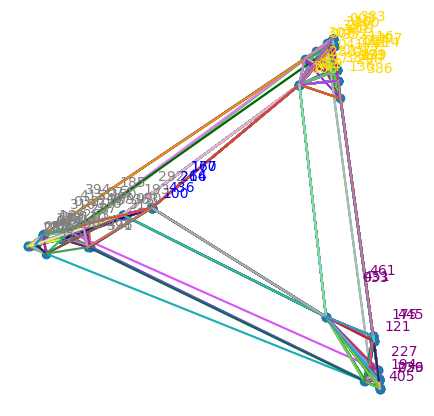

In [12]:
communities1 = GRAPH(lap1, IDic1)

We then grab the eigenvalues and eigenvectors of this graph for reference on the strength of connectivity and behavior of the graph.

In [13]:
eigenstuff1 = eigenstuff(lap1, IDic1)
eigenstuff1

,,,,,,,,,,,...,,,,,,,,,,
Eig Val,0.000,2.532,5.664,7.765,19.739,19.951,20.0,20.430,20.678,21.120,...,56.000,56.000,57.234,58.138,61.000,61.000,61.000,61.000,61.000,62.990
458989,0.088,0.079,-0.118,0.007,-0.001,-0.003,0.0,0.001,-0.003,0.002,...,0.000,0.000,0.010,-0.011,0.000,-0.000,0.000,0.000,0.000,0.006
458994,0.088,0.048,0.117,0.007,-0.001,0.002,0.0,-0.001,-0.001,-0.004,...,-0.000,-0.000,-0.020,0.021,-0.000,-0.000,0.000,0.000,0.000,-0.025
459000,0.088,0.048,0.117,0.007,-0.001,0.002,0.0,-0.001,-0.001,-0.004,...,-0.000,-0.000,-0.020,0.021,0.000,0.000,0.000,0.000,-0.000,-0.025
459003,0.088,0.048,0.117,0.007,-0.001,0.002,0.0,-0.001,-0.001,-0.004,...,0.000,0.000,-0.020,0.021,0.000,0.000,-0.000,-0.000,-0.000,-0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459451,0.088,0.043,-0.075,-0.006,0.000,-0.001,0.0,-0.002,-0.002,0.003,...,0.816,-0.021,0.005,0.006,0.000,0.000,0.000,-0.000,0.000,-0.229
459459,0.088,0.025,0.085,-0.004,0.000,0.001,0.0,-0.003,-0.001,-0.000,...,0.000,-0.000,0.034,-0.043,-0.452,-0.265,0.539,0.095,-0.509,0.347
459461,0.088,0.043,-0.075,-0.006,0.000,-0.001,0.0,-0.002,-0.002,0.003,...,-0.390,0.718,0.005,0.006,-0.000,0.000,0.000,0.000,0.000,-0.229
459466,0.088,0.075,-0.092,0.007,-0.001,-0.002,-0.0,0.000,-0.003,0.001,...,0.000,0.000,0.096,-0.067,0.000,-0.000,0.000,-0.000,-0.000,0.023


Finally, we grab the relative strengths of the community clusters through the eigenvalues associated with the eigenvectors that did the splitting.

In [40]:
strengths1 = relativestr(eigenstuff1)
strengths1

[44.7, 59.9]

We now repeat the graphing and eigenstuff process as above for the second edge set.

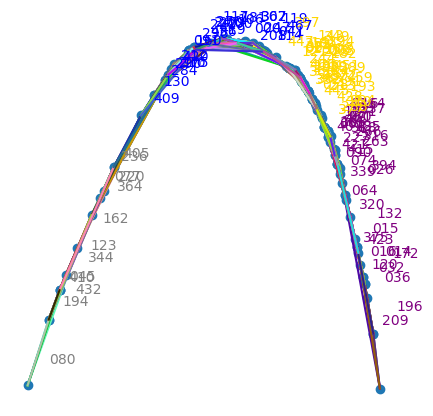

In [14]:
communities2 = GRAPH(lap2, IDic2)

In [15]:
eigenstuff2 = eigenstuff(lap2, IDic2)
eigenstuff2

,,,,,,,,,,,...,,,,,,,,,,
Eig Val,0.000,0.945,2.609,4.113,6.318,7.729,9.016,11.0,11.018,12.0,...,43.00,43.000,44.0,44.202,44.334,44.679,45.239,45.869,47.212,48.194
458989,-0.088,0.062,-0.001,0.071,-0.002,0.051,-0.077,-0.0,0.009,0.0,...,-0.00,0.000,-0.0,0.041,-0.088,0.061,-0.040,0.023,-0.072,0.036
458994,-0.088,0.059,0.002,0.062,-0.003,0.030,-0.037,0.0,0.001,0.0,...,-0.00,-0.000,-0.0,0.006,-0.012,-0.019,0.024,0.015,0.015,-0.075
459000,-0.088,-0.022,0.092,-0.040,0.025,-0.071,0.070,-0.0,0.034,0.0,...,-0.00,-0.000,0.0,-0.011,0.022,0.014,-0.002,-0.008,-0.009,0.036
459003,-0.088,0.035,0.051,0.058,0.041,-0.013,0.064,0.0,-0.033,0.0,...,-0.42,0.117,0.0,-0.232,-0.028,0.179,-0.228,0.034,-0.217,0.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459451,-0.088,0.043,0.039,0.068,0.035,0.007,0.029,0.0,-0.029,0.0,...,0.00,0.000,0.0,-0.157,0.669,0.280,-0.040,-0.426,0.210,-0.092
459459,-0.088,0.051,0.021,0.067,0.016,0.022,-0.011,0.0,-0.012,0.0,...,0.00,0.000,0.0,-0.032,0.106,0.126,-0.187,0.585,0.616,0.328
459461,-0.088,0.064,-0.006,0.071,-0.007,0.058,-0.096,-0.0,0.016,0.0,...,-0.00,-0.000,-0.0,0.008,-0.042,-0.027,0.022,-0.007,-0.055,0.065
459466,-0.088,0.034,0.055,0.062,0.049,-0.016,0.079,0.0,-0.044,0.0,...,-0.00,0.000,-0.0,0.023,-0.052,0.026,-0.022,-0.021,0.082,0.027


In [39]:
strengths2 = relativestr(eigenstuff2)
strengths2

[36.2, 52.5]

<h2>Conclusion</h2>

<div style = "text-align: justify">The lower the value (the percentages) obtained by evaluating the relativity of the eigenvalues indicates stronger connectivity of the nodes within the communities compared to the connectivity those nodes (within the community) to the nodes outside of the community. More simply, the lower the percentage, the better the communities are. Better being determined by more closely connected nodes within communities. Specifically the eigenvalues measure the "jumpiness" or "smoothness" of the graph segmentation.</div>

<div style = "text-align: justify">Comparing the strength of communities segmentation between the two edge sets, we can see that the second edge set creates stronger groupings. This is comparing the percentages obtained. The first percentage marks the strength of splitting the graph into two communties and the second percentage marks the strength of splitting those two communities into two more communities. From the first set we have $44.7\%$ and $59.9\%$, and from the second set we have $36.2\%$ and $52.5\%$. Both of the percentages from the second set are less than the percentages from the first set, implying more strongly connected groupings using the second edge set.</div>

<div style = "text-align: justify"></div>